## Name: Devit Sah    Roll No:102217044

## Assignment - 3

Apply topsis to find the best pre-trained model for Text coversational .Upload the results with proper description ,graphs ,tables etc.

Text Conversational: Text Conversational refers to AI-driven systems
designed to generate or process text-based conversations. These systems aim to understand, generate, and respond to human language naturally and contextually.

We are using TOPSIS (Technique for Order Preference by Similarity to Ideal Solution) to find the best pre-trained model for text-based conversational AI.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

tep 1: Define the Problem
We have 5 models:
*   BERT
*   GPT-3.5
*   T5
*   DialoGPT
*   XLNet
We evaluate them based on 5 criteria:
1. Accuracy (Higher is better)
2. Perplexity (Lower is better)
3. Response Time (Lower is better)
4. BLEU Score (Higher is better)
5. F1 Score (Higher is better)

Each criterion has a weight (importance factor), where Accuracy is given the most importance (0.3).

In [2]:
# Step 1: Define the pre-trained models and evaluation criteria
models = ["BERT", "GPT-3.5", "T5", "DialoGPT", "XLNet"]
criteria = ["Accuracy", "Perplexity", "Response Time", "BLEU Score", "F1 Score"]
weights = [0.3, 0.2, 0.2, 0.2, 0.1]  # Adjust importance of each criterion

Step 2: Input Performance Data
We have a hypothetical dataset showing how well each model performs on these criteria.

In [3]:
# Step 2: Sample performance scores for each model (hypothetical values)
performance_data = np.array([
    [85, 12, 1.2, 45, 78],  # BERT
    [92, 8, 1.5, 50, 80],   # GPT-3.5
    [88, 10, 1.1, 48, 79],  # T5
    [83, 14, 1.0, 42, 76],  # DialoGPT
    [86, 11, 1.3, 46, 77]   # XLNet
])

Step 3: Normalize the Data
Since each criterion has different units (e.g., Accuracy is a percentage, while Response Time is in seconds), we normalize the data using Min-Max scaling to bring everything into the same range (0 to 1).

🚨 Special case:

Perplexity & Response Time should be lower, so we invert their values (1 - normalized value).

In [4]:
# Step 3: Normalize the criteria (higher is better for all except Perplexity & Response Time)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(performance_data)

In [5]:
# Invert criteria where lower is better (Perplexity and Response Time)
normalized_data[:, 1] = 1 - normalized_data[:, 1]  # Perplexity
normalized_data[:, 2] = 1 - normalized_data[:, 2]  # Response Time

Step 4: Apply Weights
We multiply each normalized value by its corresponding weight to account for its importance.

In [6]:
# Step 4: Compute weighted normalized decision matrix
weighted_normalized = normalized_data * weights


Step 5: Find the Ideal Best & Worst Values
1. Ideal Best → The highest value for each criterion
2. Ideal Worst → The lowest value for each criterion

In [7]:
# Step 5: Determine ideal best and worst values
ideal_best = np.max(weighted_normalized, axis=0)  # Best values for each criterion
ideal_worst = np.min(weighted_normalized, axis=0)  # Worst values for each criterion

Step 6: Calculate Distances
For each model, we calculate:
1. Distance to the Best model (smaller is better)
2. Distance to the Worst model (larger is better)

In [8]:
# Step 6: Compute Euclidean distances from ideal best and worst
distance_best = np.sqrt(np.sum((weighted_normalized - ideal_best) ** 2, axis=1))
distance_worst = np.sqrt(np.sum((weighted_normalized - ideal_worst) ** 2, axis=1))

Step 7: Compute TOPSIS Scores
The TOPSIS score is calculated as:

TOPSIS Score
=
Distance to Worst/
Distance to Best
+
Distance to Worst


A higher score means the model is closer to the best solution.

In [9]:
# Step 7: Compute TOPSIS scores
topsis_scores = distance_worst / (distance_best + distance_worst)

Step 8: Rank the Models
Models are sorted in descending order based on their TOPSIS scores. The highest score gets Rank 1.

In [10]:
# Step 8: Rank the models
rankings = np.argsort(-topsis_scores)  # Higher score is better


In [19]:
# Create results dataframe
results_df = pd.DataFrame({
    "Model": np.array(models)[rankings],
    "TOPSIS Score": topsis_scores[rankings],
    "Rank": np.arange(1, len(models) + 1)  # Assign correct ranking order
})


Step 9: Visualize the Results
1. Bar Chart to show scores of different models
2. Pie Chart to show the proportion of scores
3. Heatmap to visualize the decision matrix

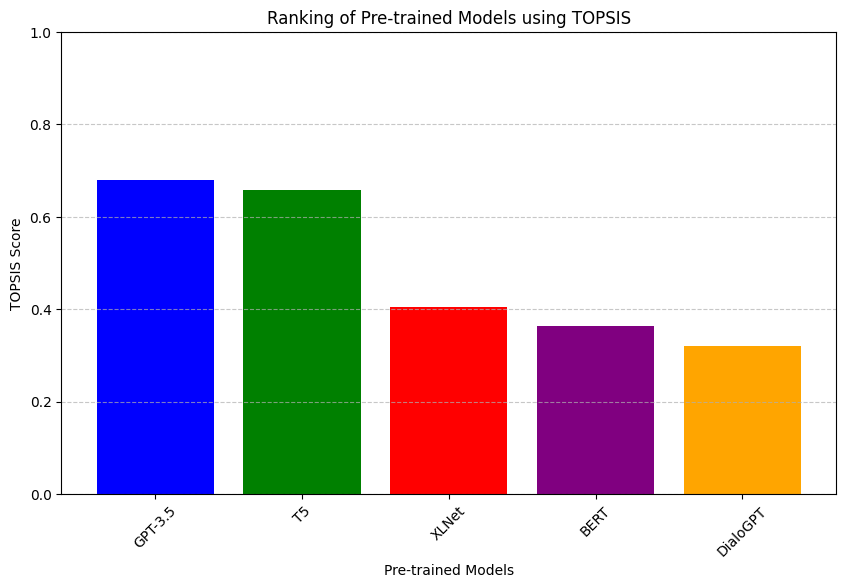

In [20]:
# Step 9: Visualization of results
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("Ranking of Pre-trained Models using TOPSIS")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


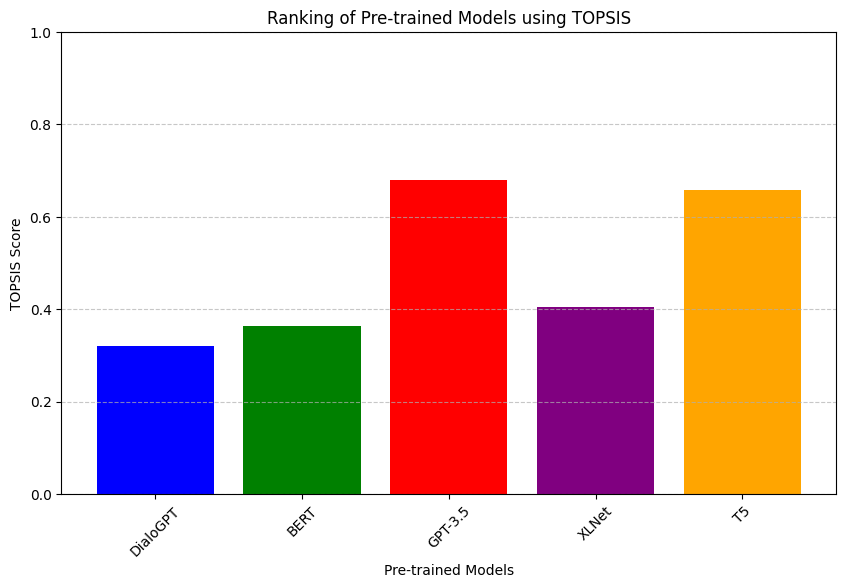

In [16]:
# Step 9: Visualization of results
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["TOPSIS Score"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("Ranking of Pre-trained Models using TOPSIS")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


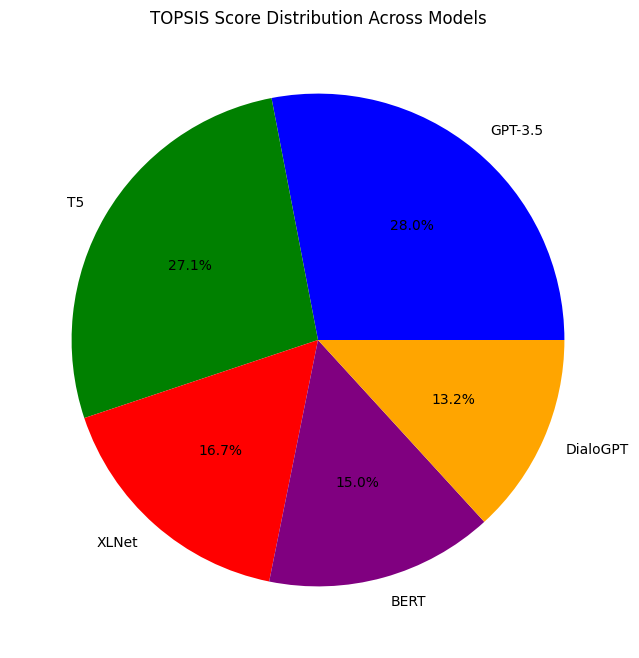

In [24]:
import seaborn as sns

# Pie Chart - Showing Proportional TOPSIS Scores
plt.figure(figsize=(8, 8))
plt.pie(results_df["TOPSIS Score"], labels=results_df["Model"], autopct="%1.1f%%", colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("TOPSIS Score Distribution Across Models")
plt.show()



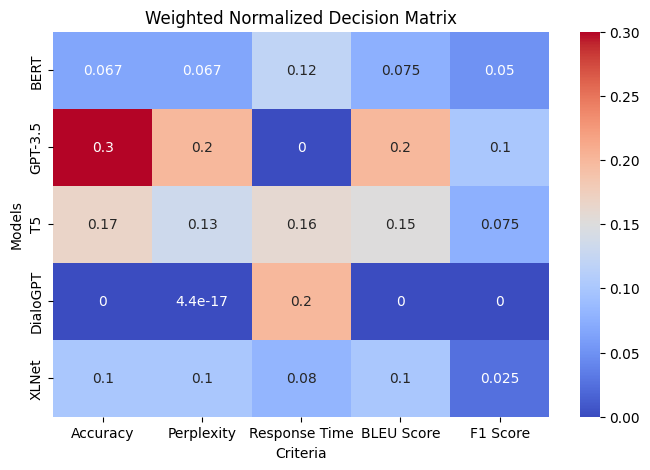

In [23]:

# Heatmap - Weighted Normalized Decision Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(weighted_normalized, annot=True, cmap="coolwarm", xticklabels=criteria, yticklabels=models)
plt.title("Weighted Normalized Decision Matrix")
plt.xlabel("Criteria")
plt.ylabel("Models")
plt.show()


Final Output:
* A table showing the TOPSIS Score & Rank for each model.
* GPT-3.5 and T5 are likely to rank the highest due to their strong performance.

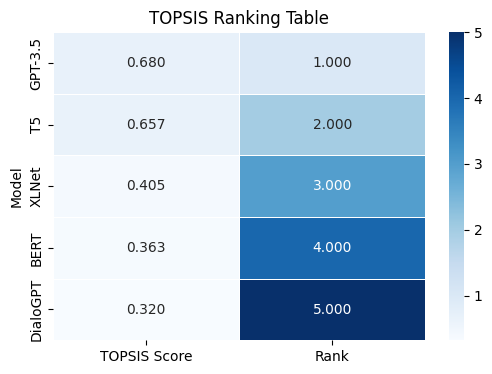

In [25]:

# Table Format - Displaying Ranked Models
plt.figure(figsize=(6, 4))
sns.heatmap(results_df.set_index("Model")[["TOPSIS Score", "Rank"]], annot=True, cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title("TOPSIS Ranking Table")
plt.show()

In [21]:
# Display final ranked results
print("Final Rankings based on TOPSIS:")
print(results_df.to_string(index=False))


Final Rankings based on TOPSIS:
   Model  TOPSIS Score  Rank
 GPT-3.5      0.679623     1
      T5      0.657469     2
   XLNet      0.404832     3
    BERT      0.362986     4
DialoGPT      0.320377     5


This method helps us choose the best pre-trained model based on multiple factors systematically.